In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline 

from src.model import RandomWalk
from src.train import generate_training_sets

Populating the interactive namespace from numpy and matplotlib


## Figure 3

We will recreate the diagram shown in Figure 3.

In [3]:
num_train_sets = 100
num_sequences   = 10 # or episodes
training_sets = generate_training_sets(num_sequences=num_sequences, num_train_sets=num_train_sets)

In [4]:
alphas  = np.array([0.005, 0.01, 0.015], dtype=dtype)
lambdas = np.array([0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0], dtype=dtype) # given in figure 3 caption

rw = RandomWalk(alphas, lambdas)

results = rw.train(training_sets)


In [5]:
data = pd.DataFrame(results)

data.columns = ["lambda", "alpha", "rms", "rmsstd"]

data = data[data.groupby(['lambda'])['rms'].transform(min) == \
            data['rms']].set_index(keys=['lambda'])

data = data.drop('alpha', 1)
data = data.drop('rmsstd', 1)
data.head()

,rms
lambda,
0.0,0.124542
0.1,0.124687
0.3,0.125357
0.5,0.127064
0.7,0.131351


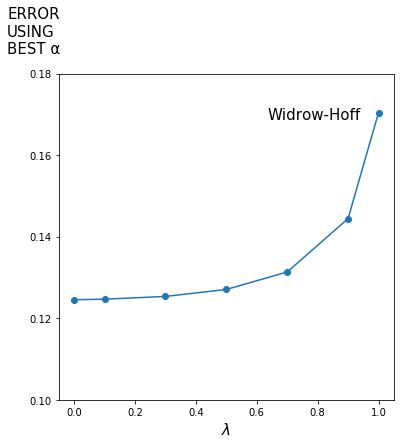

In [24]:
plt.figure(num=None, figsize=(6, 6), dpi=72)
plt.xlabel(r"$\lambda$", size=15)
# plt.title("Figure 3")
plt.text(.79, .17, "Widrow-Hoff", ha="center", va="center", rotation=0,size=15)
plt.text(-.22, .185, "ERROR\nUSING\nBEST α",size=15)
plt.plot(data,marker='o')
plt.xticks([i * .1 for i in range(0, 11) if i % 2 == 0])
plt.yticks([(i * .01) for i in range(10, 20) if i % 2 == 0])
plt.savefig('plots/random_walk_fig3.png',dpi=72);

## Figure 4

In [25]:
lambdas_ = [1,0,0.8,0.3]
alphas = np.linspace(0,0.7,20)
RMSEs = {1:[],0:[],0.8:[],0.3:[]}